# Example notebook showing how to analyse himawari data on pawsey

In [1]:
# Use a dask client
from dask.distributed import Client, LocalCluster, worker, progress, wait
import dask
from dask_jobqueue import SLURMCluster


In [2]:
cluster = SLURMCluster()
client=Client(cluster)
cluster.scale(8)
client


Bad key "backend.qt5" on line 5 in
/home/mrayson/.config/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/home/mrayson/group/mrayson/miniconda3/envs/soda/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://146.118.38.50:35088 Dashboard: http://146.118.38.50:35089/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
#import cmocean
#import cartopy


In [4]:
%matplotlib notebook

In [5]:
datafile = '/home/mrayson/scratch/HIMAWARI/NWS_zarr.zip'

ds = xr.open_zarr(datafile)
ds

<xarray.Dataset>
Dimensions:                  (lat: 1001, lon: 1751, time: 34688)
Coordinates:
  * lat                      (lat) float32 -5.0 -5.0199966 ... -24.979996 -25.0
  * lon                      (lon) float32 110.0 110.02 110.04 ... 144.98 145.0
  * time                     (time) datetime64[ns] 2016-01-01T00:00:17 ... 2019-12-31T23:00:17
Data variables:
    sea_surface_temperature  (time, lat, lon) float32 dask.array<chunksize=(1, 1001, 1751), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.4,Unidata Observation Dataset v1.0
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    algorithm_version:          1.02
    cdm_data_type:              grid
    comment:                    SST from AHI
    contact:                    ghrsst@eorc.jaxa.jp
    creator_email:              ghrsst@eorc.jaxa.jp
    creator_name:               Japan Aerospace Exploration Agency
    creator_url:                http://www.eorc.jaxa.jp/en/index.php
    date_created:               20191204T022743Z
    easternmost_longitude:      -160.0
    file_quality_level:         1
    gds_version_id:             02.0
    geospatial_lat_resolution:  0.019999999552965164
    geospatial_lat_units:       degrees north
    geospatial_lon_resolution:  0.019999999552965164
    geospatial_lon_units:       degrees east
    history:                    L2P data file originally produced by JAXA
    id:                         H08_AHI-JAXA-L3C-v01.2
    institution:                Japan Aerospace Exploration Agency(JAXA)
    keywords:                   Oceans > Ocean Temperature > Sea Surface Temp...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD)
    license:                    GHRSST protocol describes data use as free an...
    metadata_link:              TBD
    naming_authority:           org.ghrsst
    netcdf_version_id:          4.3.2
    northernmost_latitude:      60.0
    platform:                   Himawari-8
    processing_level:           L3C
    product_version:            1.2
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_email:            ghrsst-po@nceo.ac.uk
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    references:                 TBD
    sensor:                     AHI
    source:                     AHI_L2_SST,OISST,ECMWF,AMSR2_L3_SIC
    southernmost_latitude:      -60.0
    spatial_resolution:         0.02 deg
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    start_time:                 20191201T000000Z
    stop_time:                  20191201T010000Z
    summary:                    TBD
    time_coverage_end:          20191201T010000Z
    time_coverage_start:        20191201T000000Z
    title:                      Sea Surface Temperature from AHI onboard Hima...
    uuid:                       c3faab4d-e798-4a83-be96-41f517e13e86
    westernmost_longitude:      80.0

<IPython.core.display.Javascript object>


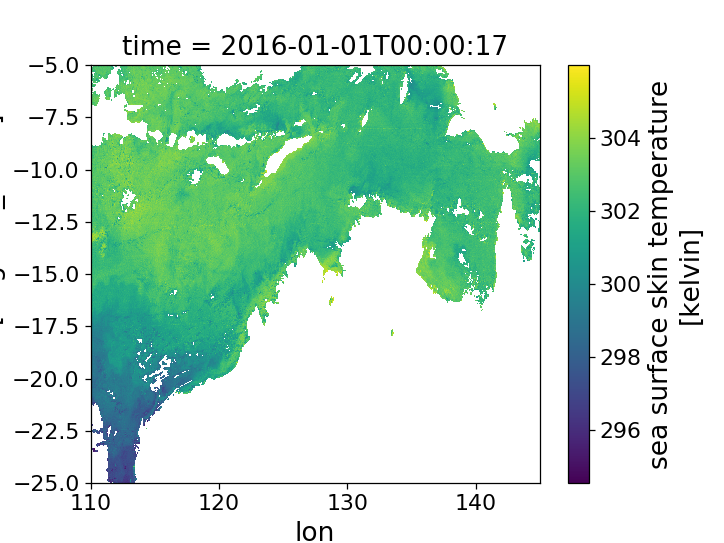

In [6]:
# Plot a map of the first time step

plt.figure()
ds['sea_surface_temperature'][0,:,:].plot()

In [7]:
# Load a time-series
lonpt = 122
latpt = -14
ts = ds.sel(lon=lonpt, lat=latpt, method='nearest')
ts

<xarray.Dataset>
Dimensions:                  (time: 34688)
Coordinates:
    lat                      float32 -14.0
    lon                      float32 122.0
  * time                     (time) datetime64[ns] 2016-01-01T00:00:17 ... 2019-12-31T23:00:17
Data variables:
    sea_surface_temperature  (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.4,Unidata Observation Dataset v1.0
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    algorithm_version:          1.02
    cdm_data_type:              grid
    comment:                    SST from AHI
    contact:                    ghrsst@eorc.jaxa.jp
    creator_email:              ghrsst@eorc.jaxa.jp
    creator_name:               Japan Aerospace Exploration Agency
    creator_url:                http://www.eorc.jaxa.jp/en/index.php
    date_created:               20191204T022743Z
    easternmost_longitude:      -160.0
    file_quality_level:         1
    gds_version_id:             02.0
    geospatial_lat_resolution:  0.019999999552965164
    geospatial_lat_units:       degrees north
    geospatial_lon_resolution:  0.019999999552965164
    geospatial_lon_units:       degrees east
    history:                    L2P data file originally produced by JAXA
    id:                         H08_AHI-JAXA-L3C-v01.2
    institution:                Japan Aerospace Exploration Agency(JAXA)
    keywords:                   Oceans > Ocean Temperature > Sea Surface Temp...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD)
    license:                    GHRSST protocol describes data use as free an...
    metadata_link:              TBD
    naming_authority:           org.ghrsst
    netcdf_version_id:          4.3.2
    northernmost_latitude:      60.0
    platform:                   Himawari-8
    processing_level:           L3C
    product_version:            1.2
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_email:            ghrsst-po@nceo.ac.uk
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    references:                 TBD
    sensor:                     AHI
    source:                     AHI_L2_SST,OISST,ECMWF,AMSR2_L3_SIC
    southernmost_latitude:      -60.0
    spatial_resolution:         0.02 deg
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    start_time:                 20191201T000000Z
    stop_time:                  20191201T010000Z
    summary:                    TBD
    time_coverage_end:          20191201T010000Z
    time_coverage_start:        20191201T000000Z
    title:                      Sea Surface Temperature from AHI onboard Hima...
    uuid:                       c3faab4d-e798-4a83-be96-41f517e13e86
    westernmost_longitude:      80.0

<IPython.core.display.Javascript object>


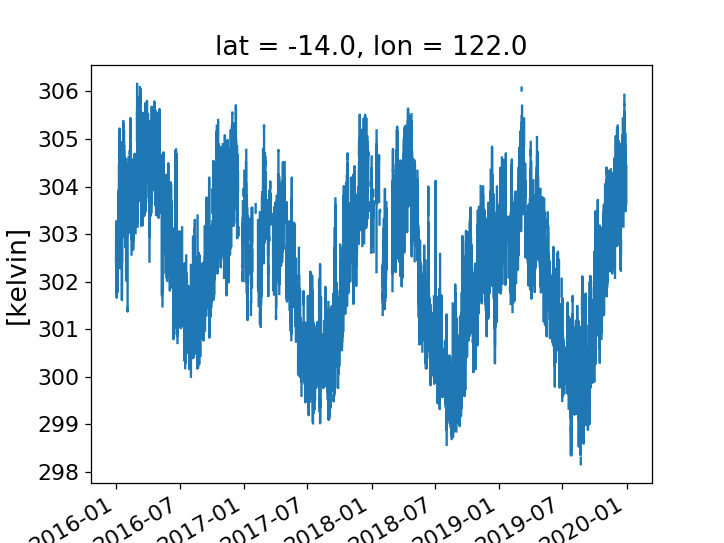

In [8]:
plt.figure()
ts['sea_surface_temperature'].plot()

In [ ]:
# Do a Hovmoller plot along a line of constant longitude
xsec = ds['sea_surface_temperature'].sel(lon=slice(120,120.02), lat=slice(-5,-20), )
xsec

In [ ]:
plt.figure()
xsec.plot()